Import required libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import RMSprop
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

Load the data

In [ ]:
# Load MNIST dataset
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

Build the model

In [ ]:
# Convolutional model
model = Sequential()

# First convolution layer
model.add(Conv2D(32, kernel_size=(3,3), strides=(2, 2), padding="same", activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Dropout(0.2))

# Second convolution layer
model.add(Conv2D(64, kernel_size=(3,3), strides=(2, 2), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Dropout(0.2))

# Third convolution layer with flattern
model.add(Conv2D(128, kernel_size=(3,3), strides=(2, 2), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="same"))
model.add(Flatten())
model.add(Dropout(0.2))

# Fully connected layer one
model.add(Dense(625, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer two
model.add(Dense(10, activation='softmax'))

Scenario one

Add noise before do the preprocess data

In [ ]:
# Add noise
noise_factor = 0.25
x_train_noisy = x_train_original + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train_original.shape)
x_test_noisy = x_test_original + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test_original.shape)

x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

# Reshaping the array to 4-dimsions
x_train_noisy = x_train_noisy.reshape(x_train_noisy.shape[0], 28, 28, 1)
x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train_noisy = x_train_noisy.astype('float32') / 255
x_test_noisy = x_test_noisy.astype('float32') / 255

# Create categorical class label data for loss function
y_train = np_utils.to_categorical(y_train_original, 10)
y_test = np_utils.to_categorical(y_test_original, 10)

print('x_train_noisy shape:', x_train_noisy.shape)
print('Number of images in x_train_noisy', x_train_noisy.shape[0])
print('Number of images in x_test_noisy', x_test_noisy.shape[0])


x_train_noisy shape: (60000, 28, 28, 1)
Number of images in x_train_noisy 60000
Number of images in x_test_noisy 10000


Add given noise factor before preprodess the data and evaluate the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_noisy, y_train, epochs=10, batch_size=128, shuffle=True, verbose=1)
evaluation = model.evaluate(x_test_noisy, y_test, batch_size=256, verbose=1)

print("\n\n")
print('Evalution summary: Loss over the test dataset : %.5f, Accuracy : %.5f' % (evaluation[0], evaluation[1]))


Epoch 1/10
60000/60000 [==============================] - 16s 271us/step - loss: 2.3016 - accuracy: 0.1114
Epoch 2/10
60000/60000 [==============================] - 16s 264us/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/10
60000/60000 [==============================] - 16s 264us/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/10
60000/60000 [==============================] - 16s 265us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 5/10
60000/60000 [==============================] - 16s 265us/step - loss: 2.3014 - accuracy: 0.1124
Epoch 6/10
60000/60000 [==============================] - 17s 280us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 7/10
60000/60000 [==============================] - 17s 284us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 8/10
60000/60000 [==============================] - 16s 263us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 9/10
60000/60000 [==============================] - 16s 263us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 10/10
10000/10000 [============

Accuracy and loss values for various noise values

In [ ]:
# Check accuracy and loss values agains different noise factors
noise_factors = [0.01, 0.02, 0.025, 0.1, 0.2, 0.25, 0.3, 0.35]
accuracy = []
loss = []

for noise in noise_factors:

  x_train_noisy = x_train_original + noise * np.random.normal(loc = 0.0, scale = 1.0, size = x_train_original.shape)
  x_test_noisy = x_test_original + noise * np.random.normal(loc = 0.0, scale = 1.0, size = x_test_original.shape)

  x_train_noisy = np.clip(x_train_noisy, 0, 1)
  x_test_noisy = np.clip(x_test_noisy, 0, 1)

  # Reshaping the array to 4-dimsions
  x_train_noisy = x_train_noisy.reshape(x_train_noisy.shape[0], 28, 28, 1)
  x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], 28, 28, 1)
  input_shape = (28, 28, 1)

  # Normalizing the RGB codes by dividing it to the max RGB value.
  x_train_noisy = x_train_noisy.astype('float32') / 255
  x_test_noisy = x_test_noisy.astype('float32') / 255

  # Evaluation
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train_noisy, y_train, epochs=10, batch_size=128, shuffle=True, verbose=1)
  evaluation = model.evaluate(x_test_noisy, y_test, batch_size=256, verbose=1)
  
  loss.append(evaluation[0])
  accuracy.append(evaluation[1])
  

Accuracy data table and loss data table

In [ ]:
# Show previos evaluate values
index_1 = 0
for value in accuracy:
  print('Noise factor : %.4f, Accuracy : %.5f' % (noise_factors[index_1], value))
  index_1 = index_1 + 1


index_2 = 0
for value in loss:
  print('Noise factor : %.4f, Loss : %.5f' % (noise_factors[index_2], value))
  index_2 = index_2 + 1

Noise factor : 0.0100, Accuracy : 0.11350
Noise factor : 0.0200, Accuracy : 0.11350
Noise factor : 0.0250, Accuracy : 0.11350
Noise factor : 0.1000, Accuracy : 0.11350
Noise factor : 0.2000, Accuracy : 0.11350
Noise factor : 0.2500, Accuracy : 0.11350
Noise factor : 0.3000, Accuracy : 0.11350
Noise factor : 0.3500, Accuracy : 0.11350
Noise factor : 0.0100, Loss : 2.30101
Noise factor : 0.0200, Loss : 2.30102
Noise factor : 0.0250, Loss : 2.30103
Noise factor : 0.1000, Loss : 2.30105
Noise factor : 0.2000, Loss : 2.30099
Noise factor : 0.2500, Loss : 2.30099
Noise factor : 0.3000, Loss : 2.30098
Noise factor : 0.3500, Loss : 2.30102


Plot result data

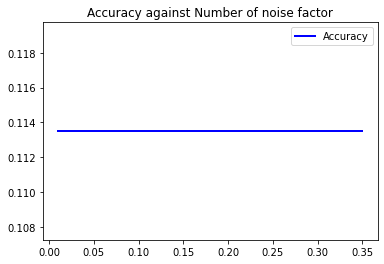

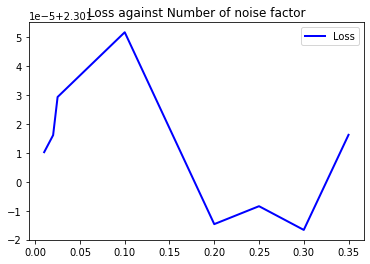

In [ ]:
# Plot the evaluate results
plt.title('Accuracy against Number of noise factor')
plt.plot(noise_factors, accuracy, color='blue', linewidth=2 , label = "Accuracy")
plt.legend()
plt.show()

print("\n\n")

plt.title('Loss against Number of noise factor')
plt.plot(noise_factors, loss, color='blue', linewidth=2, label = "Loss")
plt.legend()
plt.show()

Scenario two

Add noise after the preprocess data

In [ ]:
# Reshaping the array to 4-dimsions
x_train = x_train_original.reshape(x_train_original.shape[0], 28, 28, 1)
x_test = x_test_original.reshape(x_test_original.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Add noise
noise_factor = 0.25
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

x_train = np.clip(x_train, 0, 1)
x_test = np.clip(x_test, 0, 1)

# Create categorical class label data for loss function
y_train = np_utils.to_categorical(y_train_original, 10)
y_test = np_utils.to_categorical(y_test_original, 10)

print('x_train_noisy shape:', x_train_noisy.shape)
print('Number of images in x_train_noisy', x_train_noisy.shape[0])
print('Number of images in x_test_noisy', x_test_noisy.shape[0])

x_train_noisy shape: (60000, 28, 28, 1)
Number of images in x_train_noisy 60000
Number of images in x_test_noisy 10000


Add noise after the preprocess and evaluate the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_noisy, y_train, epochs=10, batch_size=128, shuffle=True, verbose=1)
evaluation = model.evaluate(x_test_noisy, y_test, batch_size=256, verbose=1)

print("\n\n")
print('Evalution summary: Loss over the test dataset : %.5f, Accuracy : %.5f' % (evaluation[0], evaluation[1]))

Epoch 1/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.1288 - accuracy: 0.9600
Epoch 2/10
60000/60000 [==============================] - 17s 275us/step - loss: 0.1253 - accuracy: 0.9609
Epoch 3/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.1182 - accuracy: 0.9634
Epoch 4/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.1178 - accuracy: 0.9630
Epoch 5/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.1138 - accuracy: 0.9641
Epoch 6/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.1089 - accuracy: 0.9654
Epoch 7/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.1092 - accuracy: 0.9652
Epoch 8/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.1063 - accuracy: 0.9665
Epoch 9/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.1010 - accuracy: 0.9680
Epoch 10/10
10000/10000 [============

Accuracy and loss values for various noise values

In [ ]:
# Check accuracy and loss values agains different noise factors
noise_factors1 = [0.01, 0.02, 0.025, 0.1, 0.2, 0.25, 0.3, 0.35]
accuracy1 = []
loss1 = []

for noise in noise_factors1:

  x_train_noisy = x_train + noise * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
  x_test_noisy = x_test + noise * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)

  x_train_noisy = np.clip(x_train_noisy, 0, 1)
  x_test_noisy = np.clip(x_test_noisy, 0, 1)

  # Evaluation
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train_noisy, y_train, epochs=10, batch_size=128, shuffle=True, verbose=1)
  evaluation = model.evaluate(x_test_noisy, y_test, batch_size=256, verbose=1)
  
  loss1.append(evaluation[0])
  accuracy1.append(evaluation[1])

Accuracy data table and loss data table

In [46]:
# Show previos evaluate values
index_3 = 0
for value in accuracy1:
  print('Noise factor : %.4f, Accuracy : %.5f' % (noise_factors1[index_3], value))
  index_3 = index_3 + 1


index_4 = 0
for value in loss1:
  print('Noise factor : %.4f, Loss : %.5f' % (noise_factors1[index_4], value))
  index_4 = index_4 + 1

Noise factor : 0.0100, Accuracy : 0.99010
Noise factor : 0.0200, Accuracy : 0.98980
Noise factor : 0.0250, Accuracy : 0.99090
Noise factor : 0.1000, Accuracy : 0.98890
Noise factor : 0.2000, Accuracy : 0.98710
Noise factor : 0.2500, Accuracy : 0.98630
Noise factor : 0.3000, Accuracy : 0.98170
Noise factor : 0.3500, Accuracy : 0.97890
Noise factor : 0.0100, Loss : 0.03075
Noise factor : 0.0200, Loss : 0.03087
Noise factor : 0.0250, Loss : 0.03236
Noise factor : 0.1000, Loss : 0.03756
Noise factor : 0.2000, Loss : 0.04190
Noise factor : 0.2500, Loss : 0.04379
Noise factor : 0.3000, Loss : 0.05963
Noise factor : 0.3500, Loss : 0.06957


Plot result data

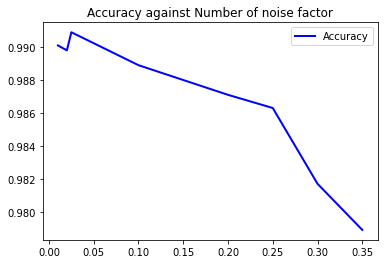

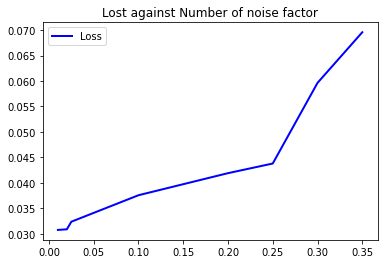

In [ ]:
# Plot the evaluate results
plt.title('Accuracy against Number of noise factor')
plt.plot(noise_factors1, accuracy1, color='blue', linewidth=2, label = "Accuracy")
plt.legend()
plt.show()

print("\n\n")

plt.title('Lost against Number of noise factor')
plt.plot(noise_factors1, loss1, color='blue', linewidth=2, label = "Loss")
plt.legend()
plt.show()